## **César Bertoni Ocampo**

In [2]:
using PyPlot #Mando a llamar el paquete de graficación PyPlot
using Calculus #Mando a llamar el paquete Calculus, para evaluar derivadas de funciones en un cierto punto mediante la
#colocación de una prima en el nombre de la función a derivar, i.e. f'(x_0) da la derivada de f en x_0

INFO: Loading help data...


### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguientes 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(1.0)
"0111111111110000000000000000000000000000000000000000000000000000"
```

In [3]:
bits(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

En una máquina de 64 bits, el primer dígito es el signo, aqui es 0, luego es positivo, luego los siguientes once dígitos son el exponente en base 2 al que se eleva la "fracción", que son los 52 números que faltan. Para pasar de esta representación a al número que representa se emplea la siguiente fórmula.

$$
(-1)^{\text{sign}}(1+\sum_{i=1}^{52} b_{52-i}2^{-i})\times2^{e-1023}
$$

En donde $b_k$ es el $k$-ésimo bit de la fracción, $e$ el exponente (en decimal), $sign$ el valor del primer bit (el orden es inverso, el primer bit para nosotros es el numerado con 63 en este caso). Vemos que si hacemos la substitución correspondiente, como todos los bits de la fracción son cero y que $e=1023$, entonces nos queda un $2^{1023-1023}=2^0$ que es precisamente 1.

In [4]:
bits(1023) #He aqui la muestra de que 1023 son 10 unos como en el exponente

"0000000000000000000000000000000000000000000000000000001111111111"

Las consultas rápidas que hice para entender lo que sucedía:


https://youtu.be/PZRI1IfStY0 (Estoy suscrito)


https://en.wikipedia.org/wiki/Double-precision_floating-point_format (Soy honesto)


Lo que sigue lo pongo por que se me hizo curioso como se iban formando los números. Se imprime el último número en decimal de los flotantes impresos.

In [5]:
a=0
for i in 0:9
    a += 2.0^(i)
    println(bits(a))
end
a

0011111111110000000000000000000000000000000000000000000000000000
0100000000001000000000000000000000000000000000000000000000000000
0100000000011100000000000000000000000000000000000000000000000000
0100000000101110000000000000000000000000000000000000000000000000
0100000000111111000000000000000000000000000000000000000000000000
0100000001001111100000000000000000000000000000000000000000000000
0100000001011111110000000000000000000000000000000000000000000000
0100000001101111111000000000000000000000000000000000000000000000
0100000001111111111100000000000000000000000000000000000000000000
0100000010001111111110000000000000000000000000000000000000000000


1023.0

In [6]:
a=0
for i in 0:53
    a += 2.0^(-i)
    println(bits(a))
end
a

0011111111110000000000000000000000000000000000000000000000000000
0011111111111000000000000000000000000000000000000000000000000000
0011111111111100000000000000000000000000000000000000000000000000
0011111111111110000000000000000000000000000000000000000000000000
0011111111111111000000000000000000000000000000000000000000000000
0011111111111111100000000000000000000000000000000000000000000000
0011111111111111110000000000000000000000000000000000000000000000
0011111111111111111000000000000000000000000000000000000000000000
0011111111111111111100000000000000000000000000000000000000000000
0011111111111111111110000000000000000000000000000000000000000000
0011111111111111111111000000000000000000000000000000000000000000
0011111111111111111111100000000000000000000000000000000000000000
0011111111111111111111110000000000000000000000000000000000000000
0011111111111111111111111000000000000000000000000000000000000000
0011111111111111111111111100000000000000000000000000000000000000
0011111111111111111111111

2.0

### Ejercicio 2

- ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

- ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


**La primera pregunta**
     
Lo pienso alreves, va evaluando las potencias de 10 desde -1000 hasta 0, en pasos de 0.00001, cuando la diferencia a es distinta a 1, le mando a imprimir el valor de la épsilon que es 10 a la potencia donde se detuvo y luego le digo que me imprima la potencia en donde se detuvo, es decir el número de índice dónde se quedó.
     
**La segunda pregunta**
     
Hago lo mismo que en la primera sólo varío en donde corresponda, el 10 en la seguda línea y en el agumento del if.

El npumero más chico es aquel que bautizo como c.

En estos ejercicios quizá deban perdonar mis códigos, estoy un poco oxidado en julia.

In [7]:
b=0.0    #FIRST QUESTION
c=0.0    #Declaro variables b y c y las inicializo en cero.
for i in 0.0:1.0:1000.0   #Corro un índice i de cero a mil aprovechando que julia va de cero en adelante
    ex = -1000.0+i+1.0    #Por eso mismo evaluo los exponentes desde el más chico al más grande.
    c=2.0^(ex)  #y elevo 2 a dicha potencia, aprovechando que es la base natural de la computadora
    b = 1.0+c #y lo resto al valor del cual nos intereza conocer la \epsilon de la máquina
    if(b != 1.0)  #si dicha diferencia se hace distinta de uno, entonces en esta última evaluación c es tan grande como
        ex2 = ex+1
        println(2.0^(ex2))  #para cambiar el valor de 1, por lo que el valor anterior que es 2.0^(ex + 1) será el valor 
        println(ex2)  #de la $epsilon de la máquina, e imprimo dicho valor y el exponente correspondiente$
        break
    end
end

4.440892098500626e-16
-51.0


Veamos que nos da este último valor de c que nos da la computadora hasta antes de que se rompa el ciclo.

In [8]:
c

2.220446049250313e-16

Observemos lo que sucede cuando este número se lo restamos a 1, aprovecho que la operación ya está guardada en la variable b.

In [9]:
b

1.0000000000000002

Y ahora vemos lo que sucede cuando al exponente $n$ de $2^{-n}$ le restamos $-1$

In [10]:
1.0+c*2.0^-1

1.0

Efectivamente la computadora no ve cambio, encontramos el valor de la $\epsilon$, ¿Pero es cierto? hagamos lo siguiente, evaluemos con la función 'eps(1.0)' el valor de la $\epsilon$ de la computadora para el número $1.0$

In [11]:
eps(1.0)

2.220446049250313e-16

Que corresponde al siguiente valor, como efectivamente lo calculo el programa.

In [12]:
2.0^(-52)

2.220446049250313e-16

In [13]:
b=0.0    #SECOND QUESTION
c=0.0    #Hago lo mismo pero ahora para 10
for i in 0.0:1.0:1000.0   
    ex = -1000.0+i+1.0    
    c=2.0^(ex)  
    b = 10.0-c 
    if(b != 10.0)  
        ex2 = ex+1
        println(2.0^(ex2))  
        println(ex2)  
        break
    end
end

3.552713678800501e-15
-48.0


Veamos que nos da este último valor de c que nos da la computadora hasta antes de que se rompa el ciclo.

In [14]:
c

1.7763568394002505e-15

Observemos lo que sucede cuando este número se lo restamos a 10, aprovecho que la operación ya está guardada en la variable b.

In [15]:
b

9.999999999999998

Y ahora vemos lo que sucede cuando al exponente $n$ de $2^{-n}$ le restamos $-1$

In [16]:
10.0+c*2.0^-1

10.0

Efectivamente la computadora no ve cambio, encontramos el valor de la $\epsilon$, ¿Pero es cierto? hagamos lo siguiente, evaluemos con la función 'eps(10.0)' el valor de la $\epsilon$ de la computadora para el número $10.0$

In [17]:
eps(10.0)

1.7763568394002505e-15

Que corresponde al siguiente valor, como efectivamente lo calculo el programa.

In [18]:
2.0^(-48.0)

3.552713678800501e-15

http://julia.readthedocs.org/en/latest/manual/integers-and-floating-point-numbers/ (Para ver si mi $\epsilon$ es la epsilon esperada almenos del orden)

### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

Reordenando la expresión de la derivada
$$
h \frac{\Delta f(x_o)}{\Delta x} (x_o)+f(x_o)=f(x_o+h)
$$
Si lo vemos como una expansión de Taylor en rededor de $x_o$, vemos que realmente
$$
O(h^2) + h\cdot f'(x_o) (x_o)+f(x_o)=f(x_o+h)
$$
Donde los términos de error están contenidos con la notación O(h^2), lo que nos quiere decir que el error es del orden de $h^2$ hasta ahora con la expansión de taylor, pero si despejamos de tal manera que tengamos la derivada, es decir

$$
f'(x_o)= \frac{f(x_0+h)-f(x_0)}{h} + \frac{O(h^2)}{h}
$$

Tenemos que el término más significativo del error es de la forma $C h^2 /h = C h$ con $C$ una constante, con lo que ahora nuestro error es del orden de $h$, por lo que esperamos que si comparamos el comportamiento de lo que realmente es la derivada de una función con la aproximación que estamos haciendo, al graficar el error respecto vs. $h$ lo que veamos debería ser una recta. Dicho error se aplica a la aproximación hecha en la primera ecuación de este ejercicio para el valor de la derivada en $x_o$

Lo que leí. Giordano, Nicholas J. & Nakanishi, Hisao. *Computational Physics*. Second Edition. Prearson Prentice Hall. 2006. pp 2-3

Más la iluminación que en la que me hizo caer el profe.

In [19]:
function derivada1(funct, x0, h) #tiene como entradas una función, un valor de x y el tamaño del paso
    (funct(x0+h)-funct(x0))/h
end

derivada1 (generic function with 1 method)

In [20]:
f(x) = x^2       #Aquí se pueden modificar las funciones a su antojo
g(x) = 2x^5-6x^4+3.3x^3+1.1x^2+7x-12.1
h(x) = tan(x)

h (generic function with 1 method)

In [21]:
function variah1(funct,x0) #como entradas una función y un valor de x
    dat = zeros(100,2) #hago un arreglo de zeros de 2 columnas y 100 hileras
    tam = length(dat[:,1]) #mido las hileras
     
    for i in 1:tam    #hago correr el índice para reasignar los valores de la primera columna a los valores de la 
        dat[i,1]=10.0^-i   #la potencia de 10 que le meto el paso, del más grande al más chico
        dat[i,2]=abs(funct'(x0)-derivada1(f,x0,10.0^-i)) #lo hice así por que en el eje x si lo hacia directo con el tamaño del 
    end         #paso no se graficaba correctamente.
    return dat
end

variah1 (generic function with 1 method)

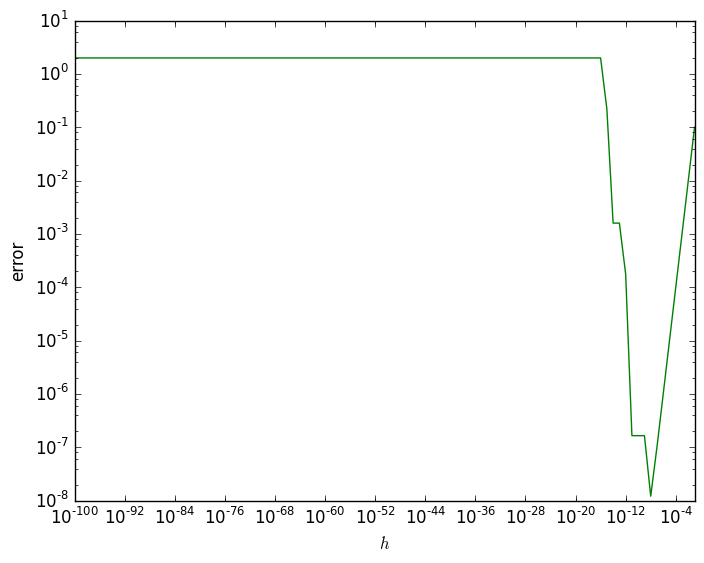

PyObject <matplotlib.text.Text object at 0x7f5af8ce0f28>

In [22]:
k = variah1(f,1);  #evaluo f' en x_o=2.5
loglog(k[:,1],k[:,2],"g")  #grafico los valores.
xlabel(L"h")
ylabel("error")

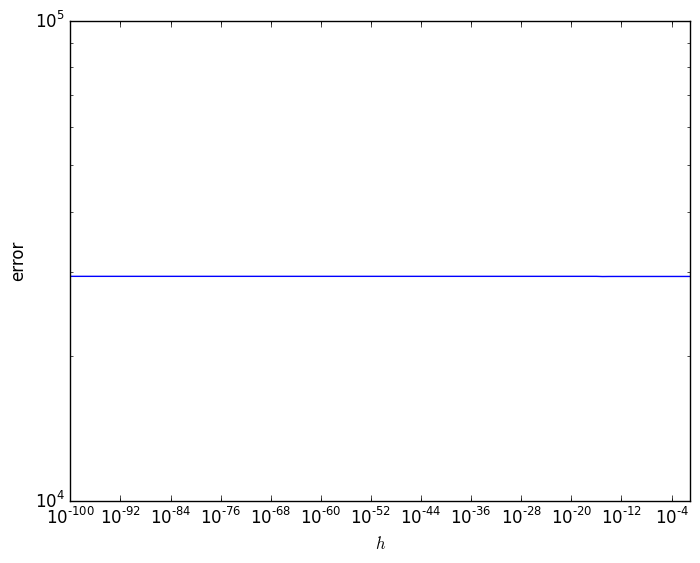

PyObject <matplotlib.text.Text object at 0x7f5af7ea4978>

In [23]:
l=variah1(g,8) #evaluo g' en x=8
loglog(l[:,1],l[:,2])
xlabel(L"h")
ylabel("error")

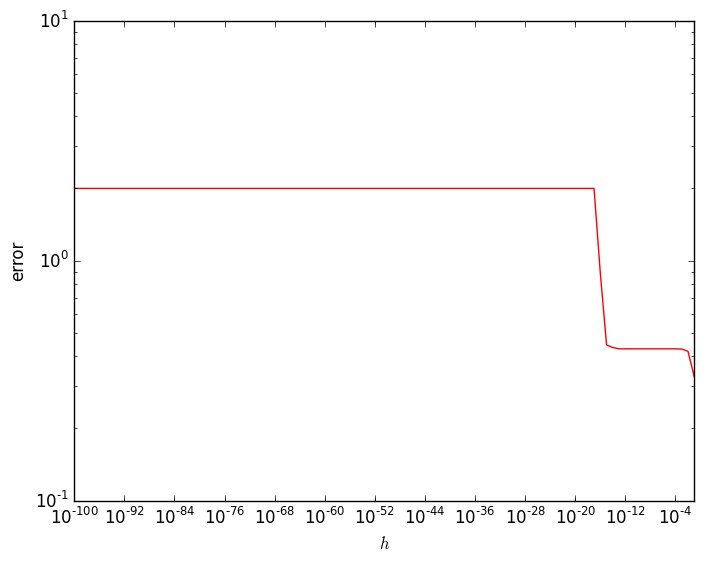

PyObject <matplotlib.text.Text object at 0x7f5af7c307f0>

In [24]:
m = variah1(h,pi/4);  #evaluo f' en x_o=2.5
loglog(m[:,1],m[:,2],"r")  #grafico los valores.
xlabel(L"h")
ylabel("error")

Lo que he notado es que no siempre se comporta de manera lineal, pues como en la primera función `f` que definí, si hay un buen intervalo de $h$ donde el comportamiento es eminentemente linal, pero, se asoma que no se obtiene una mejor precisión al hacer más chica la $h$, por otra parte, depende la precisión no sólo de la función que le estemos metiendo sino del punto donde estemos calculando la derivada, pero al menos para polinomios sencillitos el error en algún momento va como $h$.

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?

Este término viene del promedio de la derivada en rededor de $x_o$, por lo que se espera que el cálculo sea más refinado al usar los valores que preceden y anteceden al punto $x_o$, si no mal recuerdo también hay una ventaja que proporciona el teorema del valor medio, en done el promedio de la derivada en cierto intervalo se puede sacar al hacer la cuenta con los valores extremos de dicho intervalo.

In [25]:
function derivada2(funct, x0, h)  #hago lo mismo que en el ejercicio anterior, solo cambio las operaciones necesarias.
    (funct(x0+h)-funct(x0-h))/(2*h)
end

derivada2 (generic function with 1 method)

In [26]:
function variah2(funct,x0)#es exactamente el código de arriba, salvo que ahora uso la nueva función derivada2
    dat = zeros(100,2)
    tam = length(dat[:,1])
    
    for i in 0:tam-1
        dat[i+1,1]=10.0^-((tam-1)-i)
        dat[i+1,2]=abs(funct'(x0)-derivada2(f,x0,10.0^-((tam-1)-i)))
    end
    return dat
end

variah2 (generic function with 1 method)

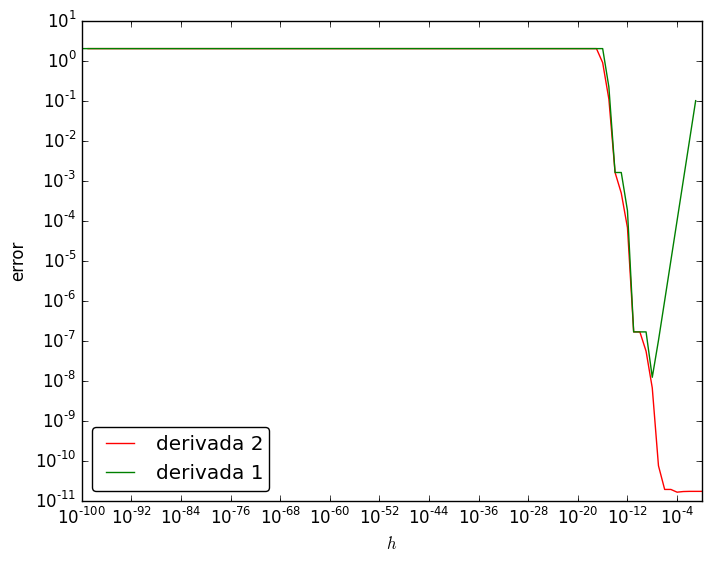

PyObject <matplotlib.legend.Legend object at 0x7f5af6f5b898>

In [40]:
n2 = variah2(f,1.0)
n1 = variah1(f,1.0);  #evaluo f' en x_o=2.5
loglog(n2[:,1],n2[:,2],"r",label=("derivada 2"))
loglog(n1[:,1],n1[:,2],"g",label=("derivada 1"))  #grafico los valores.#la gráfica para f
xlabel(L"h")
ylabel("error")
legend(loc="lower left",fancybox="true")

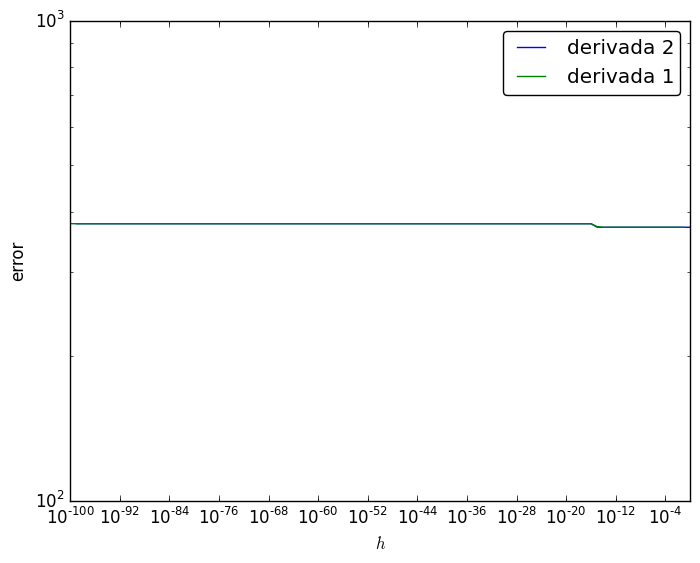

PyObject <matplotlib.legend.Legend object at 0x7f5af6ca3ef0>

In [42]:
o2 = variah2(g,3.2);
o1 = variah1(g,3.2);
loglog(o2[:,1],o2[:,2],label=("derivada 2")) #la gráfica para g
loglog(o1[:,1],o1[:,2],label=("derivada 1"))
xlabel(L"h")
ylabel("error")
legend(loc="upper right",fancybox="true")

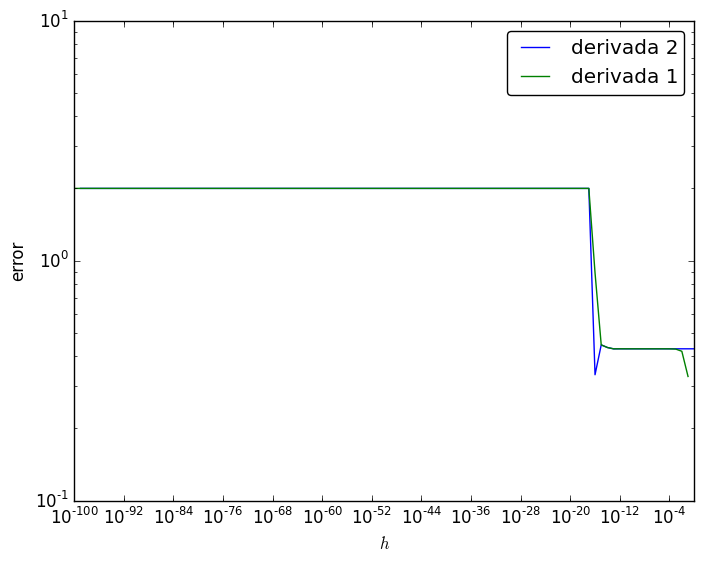

PyObject <matplotlib.legend.Legend object at 0x7f5af70f4860>

In [39]:
p2 = variah2(h,pi/4);
p1 = variah1(h,pi/4);
loglog(p2[:,1],p2[:,2],label=("derivada 2")) #la gráfica para g
loglog(p1[:,1],p1[:,2],label=("derivada 1"))
xlabel(L"h")
ylabel("error")
legend(loc="upper right",fancybox="true")

Se aprecia cómo el error, conforme $h$ es más chica no se vuelve más pequeño, al contrario, lo que sí se aprecia es cómo convergen ambos métodos a un valor de error, conforme $h$ se hace más grande comienzan a separarse los valores del error y en general se aprecia una ventaja del segúndo método para calcular la derivada. Se aprecia además en la primera función que pruebo que el error ("a ojo de buen cubero") va como h.

### Ejercicio 5

Manda el notebook con tus resultados haciendo un pull-request al repositorio del curso. Para hacer esto:
- Haz un `fork` del repositorio del curso a tu propia cuenta en GitHub
- Una vez que tengas resuelto el notebook, súbelo a **tu** repositorio (con `git push`), en la carpeta "tareas/usuario_github/nombre_notebook"
- Desde tu repositorio, haz un "Pull Request". El *pull request* sólo se aceptará si es legible en el sentido más amplio de la palabra y, obviamente, si es correcto. Esto significa que debe ser *entendible*, a partir de lo que ustedes escriben, incluso para gente que no está en el curso. (Como GitHub es público, piensen fríamente que esto puede ser leido por *muuucha* gente allá afuera.) Si el trabajo es en colaboración, háganlo saber en el propio notebook (cosa que se debe notar en el historial de lo que envíen). Finalmente, como código ético, incluyan cualquier fuente de inspiración, incluso cuando se trate del notebook de otro compañero/equipo del curso.